Создадим первую выборку

In [1]:
import pandas as pd
data = pd.read_csv('Data.csv')
data = data[data['Name'] == 'Tim Duncan']
first_selection = data['FieldGoalsPercentage'][~data['FieldGoalsPercentage'].isin([0, 100])]
first_selection

7        40.0
26       60.9
42       33.3
57       61.5
72       61.5
         ... 
15570    57.1
15585    12.5
15598    25.0
15629    16.7
15637    50.0
Name: FieldGoalsPercentage, Length: 527, dtype: float64

И вторую


In [2]:
second_selection = data['FieldGoalsAttempted']
second_selection

7        10
26       23
42        6
57       13
72       13
         ..
15585     8
15598     4
15612     0
15629     6
15637    14
Name: FieldGoalsAttempted, Length: 537, dtype: int64

Теперь построим вариационный ряд для первой выборки

In [3]:
def variation_series(selection, step):
    length = len(selection)
    maximum = selection.max()
    current = 0
    series = {}
    while current < maximum:
        key = '%s - %s' % (current, current + step)
        series[key] = [len(selection[(current <= selection) & (selection < current + step)]) / length]
        current += step
    return pd.DataFrame(series)

variation_series(first_selection, 10)

,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90
0,0.001898,0.020873,0.041746,0.148008,0.227704,0.301708,0.184061,0.049336,0.02277



И для второй

In [4]:
variation_series(second_selection, 5)

,0 - 5,5 - 10,10 - 15,15 - 20,20 - 25,25 - 30
0,0.027933,0.243948,0.435754,0.223464,0.063315,0.005587



Выборочное среднее для первой

In [5]:
first_selection.mean()

49.92390891840608


И для второй

In [6]:
second_selection.mean()

12.327746741154563

Выборочная дисперсия для первой

In [7]:
import math

def central_moment(selection, k):
    length = len(selection)
    mean = selection.mean()
    sum = 0
    for item in selection:
        sum += math.pow(item - mean, k)
    return sum / length

central_moment(first_selection, 2)

198.06443785128724


И для второй

In [8]:
central_moment(second_selection, 2)

20.261297157461467


Исправленная дисперсия для первой

In [9]:
def corrected_variance(selection):
    length = len(selection)
    return (length / (length - 1)) * central_moment(selection, 2)

corrected_variance(first_selection)

198.44098621222125


И для второй

In [10]:
corrected_variance(second_selection)

20.299098084994046

Коэффициент ассиметрии для первой

In [11]:
def asymmetry_coefficient(selection):
    moment3 = central_moment(selection, 3)
    moment2 = central_moment(selection, 2)
    return moment3 / math.pow(moment2, 3 / 2)

asymmetry_coefficient(first_selection)

-0.043344497921975284

И для второй

In [12]:
asymmetry_coefficient(second_selection)

0.20449439855961962

Эксцесс для первой выборки

In [13]:
def excess(selection):
    moment4 = central_moment(selection, 4)
    moment2 = central_moment(selection, 2)
    return (moment4 / math.pow(moment2, 2)) - 3

excess(first_selection)

0.15686705819937075

И для второй

In [14]:
excess(second_selection)

-0.14326343821126164

Размах первой выборки

In [15]:
def selection_range(selection):
    return selection.max() - selection.min()

selection_range(first_selection)

81.7

Второй

In [16]:
selection_range(second_selection)

26

Медиана первой выборки

In [17]:
first_selection.median()

50.0

Второй

In [18]:
second_selection.median()

12.0

Квартили и квантиль уровня 1/3 первой выборки

In [19]:
print('q = 1/4; Z = %s' % first_selection.quantile(.25))
print('q = 1/2; Z = %s' % first_selection.median())
print('q = 3/4; Z = %s' % first_selection.quantile(.75))
print('q = 1/3; Z = %s' % first_selection.quantile(1/3))

q = 1/4; Z = 40.0
q = 1/2; Z = 50.0
q = 3/4; Z = 60.0
q = 1/3; Z = 43.8


Второй

In [20]:
print('q = 1/4; Z = %s' % second_selection.quantile(.25))
print('q = 1/2; Z = %s' % second_selection.median())
print('q = 3/4; Z = %s' % second_selection.quantile(.75))
print('q = 1/3; Z = %s' % second_selection.quantile(1/3))

q = 1/4; Z = 9.0
q = 1/2; Z = 12.0
q = 3/4; Z = 15.0
q = 1/3; Z = 10.0


Гистограмма, полигон частот и график плотности (вероятностей) нормального закона распределения для первой выборки

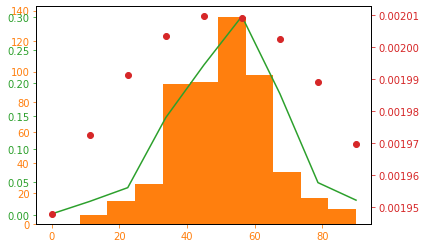

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

def mixed_plot(selection, step, func, *args):
    var = variation_series(selection, step).loc[0]
    fig, ax1 = plt.subplots()
    ax1.hist(selection, color="C1")
    ax1.tick_params(axis='x', colors="C1")
    ax1.tick_params(axis='y', colors="C1")

    dots_amount = int(selection.max() // step if (selection.max() / step) % 1 == 0 else (selection.max() // step) + 1)
    x_max = int(selection.max())
    x = np.linspace(0, x_max, dots_amount)
    ax2 = ax1.twinx()
    ax2.plot(x, var, color="C2")
    ax2.tick_params(axis='x', colors="C2")
    ax2.tick_params(axis='y', colors="C2")
    
    ax3 = ax2.twinx()
    y = func(*args)
    ax3.plot(x, y, 'o', color="C3")
    ax3.tick_params(axis='x', colors="C3")
    ax3.tick_params(axis='y', colors="C3")
    
    plt.show()

x = np.linspace(0, first_selection.max(), 9)
mixed_plot(first_selection, 10, scipy.stats.norm.pdf, x, first_selection.mean(), corrected_variance(first_selection))

И для второй

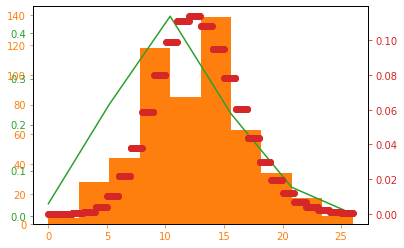

In [23]:
var = variation_series(second_selection, 5).loc[0]
fig, ax1 = plt.subplots()
ax1.hist(second_selection, color="C1")
ax1.tick_params(axis='x', colors="C1")
ax1.tick_params(axis='y', colors="C1")

dots_amount = second_selection.max() // 5 if (second_selection.max() / 5) % 1 == 0 else (second_selection.max() // 5) + 1
x = np.linspace(0, second_selection.max(), dots_amount)
ax2 = ax1.twinx()
ax2.plot(x, var, color="C2")
ax2.tick_params(axis='x', colors="C2")
ax2.tick_params(axis='y', colors="C2")

ax3 = ax2.twinx()
x = np.linspace(0, second_selection.max(), len(second_selection))
y = [scipy.stats.poisson.pmf(int(i), second_selection.mean()) for i in x]
ax3.plot(x, y, 'o', color="C3")
ax3.tick_params(axis='x', colors="C3")
ax3.tick_params(axis='y', colors="C3")

plt.show()

Графики эмпирической функции распределения для первой выборки и функции распределения нормального закона распределения

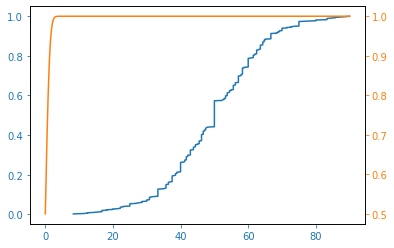

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(first_selection)
fig, ax1 = plt.subplots()
ax1.plot(ecdf.x, ecdf.y, color='C0')
ax1.tick_params(axis='x', colors="C0")
ax1.tick_params(axis='y', colors="C0")
ax2 = ax1.twinx()
x = np.linspace(0, int(first_selection.max()), len(first_selection))
y = scipy.stats.norm.cdf(x)
ax2.plot(x, y, color='C1')
ax2.tick_params(axis='x', colors='C1')
ax2.tick_params(axis='y', colors='C1')
plt.show()

Графики эмпирической функции распределения для второй выборки и функции распределения закона распределения Пуассона

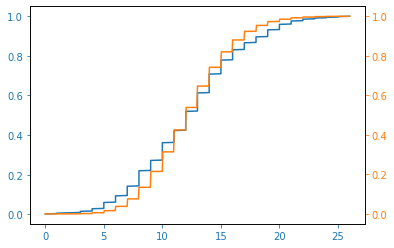

In [33]:
ecdf = ECDF(second_selection)
fig, ax1 = plt.subplots()
ax1.plot(ecdf.x, ecdf.y, color='C0')
ax1.tick_params(axis='x', colors="C0")
ax1.tick_params(axis='y', colors="C0")
ax2 = ax1.twinx()
x = np.linspace(0, int(second_selection.max()), len(second_selection))
y = [scipy.stats.poisson.cdf(int(i), second_selection.mean()) for i in x]
ax2.plot(x, y, color='C1')
ax2.tick_params(axis='x', colors='C1')
ax2.tick_params(axis='y', colors='C1')
plt.show()

Ящик с усами для первой выборки

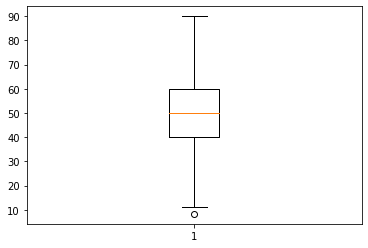

In [34]:
plt.boxplot(first_selection)
plt.show()


И для второй

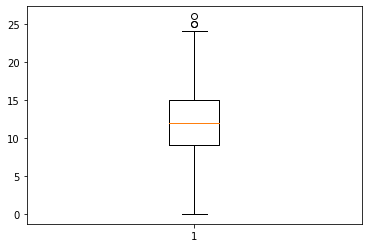

In [35]:
plt.boxplot(second_selection)
plt.show()
